<h1 style="text-align:center; font-size:32px; font-weight:bold;">
Notre objectif est d'utiliser les données pour prédire si une personne développera une maladie cardiaque.
</h1>

---
# **Observation of Variables**

| Variable | Description |
|---------|-------------|
| **patientid** | Unique ID of each patient |
| **age** | Age of the patient |
| **gender** | Biological sex (male = 1 /female = 0) |
| **chestpain** | Type and intensity of chest pain (0,1,2,3) |
| **restingBP** | Resting blood pressure (94-200) |
| **serumcholestrol** | Blood cholesterol level (126-564)|
| **fastingbloodsugar** | Fasting blood sugar level (true if > 120 mg/dl , otherwise false)|
| **restingelectro** | Resting ECG results (0,1,2)|
| **maxheartrate** | Maximum heart rate achieved(71-202) |
| **exerciseangia** | Exercise-induced angina (yes = 1,no = 0)|
| **oldpeak** | ST-segment deviation from resting values (0-6.2)|
| **slope** | Slope of the ST segment during exercise (1 - upslopping,2 - flat, 3 - downslopping)|
| **noofmajorvessels** | Number of major vessels visualized (0,1,2,3) |
| **target** | Presence of heart disease (0 = absence , 1 = presense)|
---

In [1]:
# sns.reset_defaults()
# plt.rcdefaults()

## **Importing libraries**

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import joblib

## **Importing data**

In [62]:
data = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [63]:
display(data.info())
display(data.describe(include='all').T)
display(data.isna().sum())
print('Duplicates:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


None

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

Duplicates: 0


# **DATA CLEANING**
## **There we are doing:**
- searching for slope which is not 1,2,3
- substituting it with nan
- then changing nan variables with median

In [64]:
data[(data["slope"] < 1) | (data["slope"] > 3)]

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
12,223295,27,1,0,129,135,0,1,192,1,1.0,0,0,0
19,260870,35,1,0,127,269,0,0,87,1,3.8,0,1,0
25,390931,71,1,1,101,352,0,1,183,0,3.6,0,0,0
26,390988,46,1,0,198,253,0,0,199,1,2.1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,9736370,65,1,0,125,346,0,1,93,1,3.9,0,0,0
988,9870657,74,1,0,136,279,0,1,122,0,1.2,0,0,0
991,9896438,24,1,0,170,354,0,0,90,1,1.5,0,0,0
994,9937998,62,1,1,125,342,0,0,128,1,2.1,0,0,0


In [65]:
data["slope"] = data["slope"].replace(0, np.nan)
data["slope"] = data["slope"].fillna(data["slope"].median())

print("Check: ", data["slope"].isna().sum())

Check:  0


## **There:**
- we are changing 0 cholestrol level by doing interpolation
- since interpolation misses some variables,we are substituting them by median

In [70]:
data["serumcholestrol"] = data["serumcholestrol"].replace(0, np.nan)

data['age_group_temp'] = pd.cut(data['age'], bins=[0, 30, 40, 50, 60, 70, 80, 100])

data["serumcholestrol"] = data["serumcholestrol"].fillna(
    data.groupby(["gender", "age_group_temp"], observed= False)["serumcholestrol"].transform("median")
)

data["serumcholestrol"] = data["serumcholestrol"].fillna(
    data.groupby("gender", observed=False)["serumcholestrol"].transform("median")
)

data.drop(columns=['age_group_temp'], inplace=True)

print("Check:", data["serumcholestrol"].isnull().sum())

Check: 0


drop patient ID

In [73]:
data = data.drop(columns=["patientid"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   gender             1000 non-null   int64  
 2   chestpain          1000 non-null   int64  
 3   restingBP          1000 non-null   int64  
 4   serumcholestrol    1000 non-null   float64
 5   fastingbloodsugar  1000 non-null   int64  
 6   restingrelectro    1000 non-null   int64  
 7   maxheartrate       1000 non-null   int64  
 8   exerciseangia      1000 non-null   int64  
 9   oldpeak            1000 non-null   float64
 10  slope              1000 non-null   float64
 11  noofmajorvessels   1000 non-null   int64  
 12  target             1000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 101.7 KB


# **DATA ANALYSIS**

## **Distribution of target value**

target
1    580
0    420
Name: count, dtype: int64

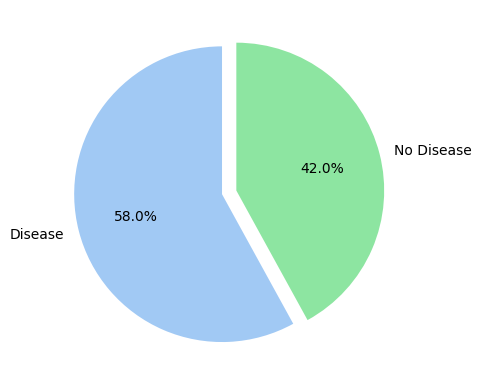

In [76]:
display(data['target'].value_counts(dropna=False))

tada = data['target'].value_counts()
labels = ["Disease", "No Disease"]
explode = [0.0, 0.1]
colors = sns.color_palette('pastel6')

plt.pie(tada,labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()



## **Dividing our features**

In [77]:
numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
categorical_features = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
target = 'target'

## **Observing correlation matrix**

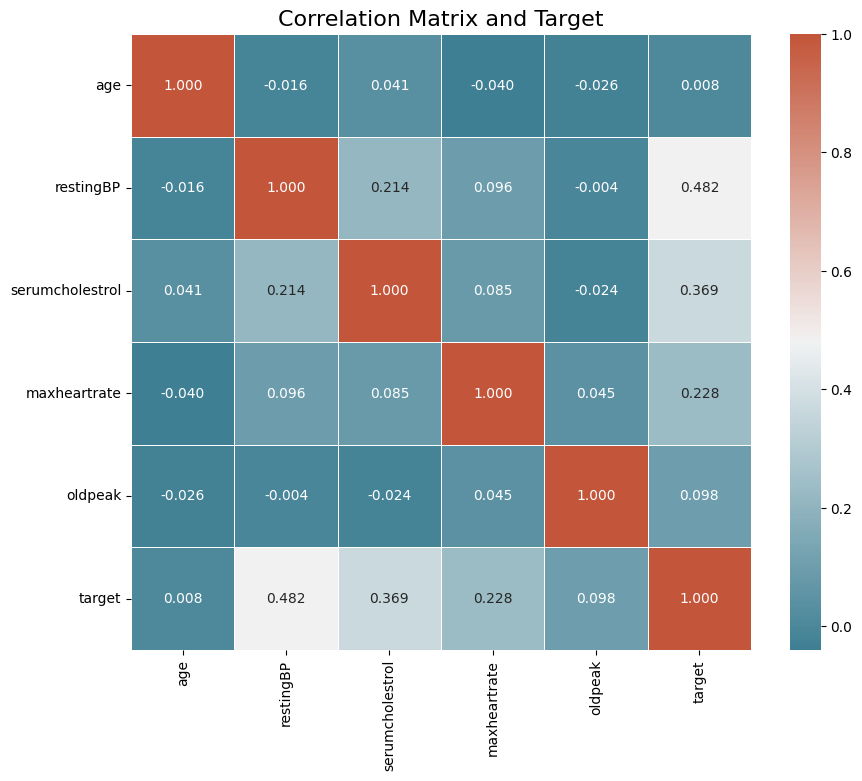

In [78]:
features_for_corr = [
    'age', 
    'restingBP', 
    'serumcholestrol', 
    'maxheartrate', 
    'oldpeak', 
    'target'
]

correlation_matrix = data[features_for_corr].corr()

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(
    correlation_matrix,
    annot=True,      
    cmap=cmap,    
    fmt=".3f",          
    linewidths=.5,      
    cbar=True           
)

plt.title('Correlation Matrix and Target', fontsize=16)
plt.show()

## Pair plot

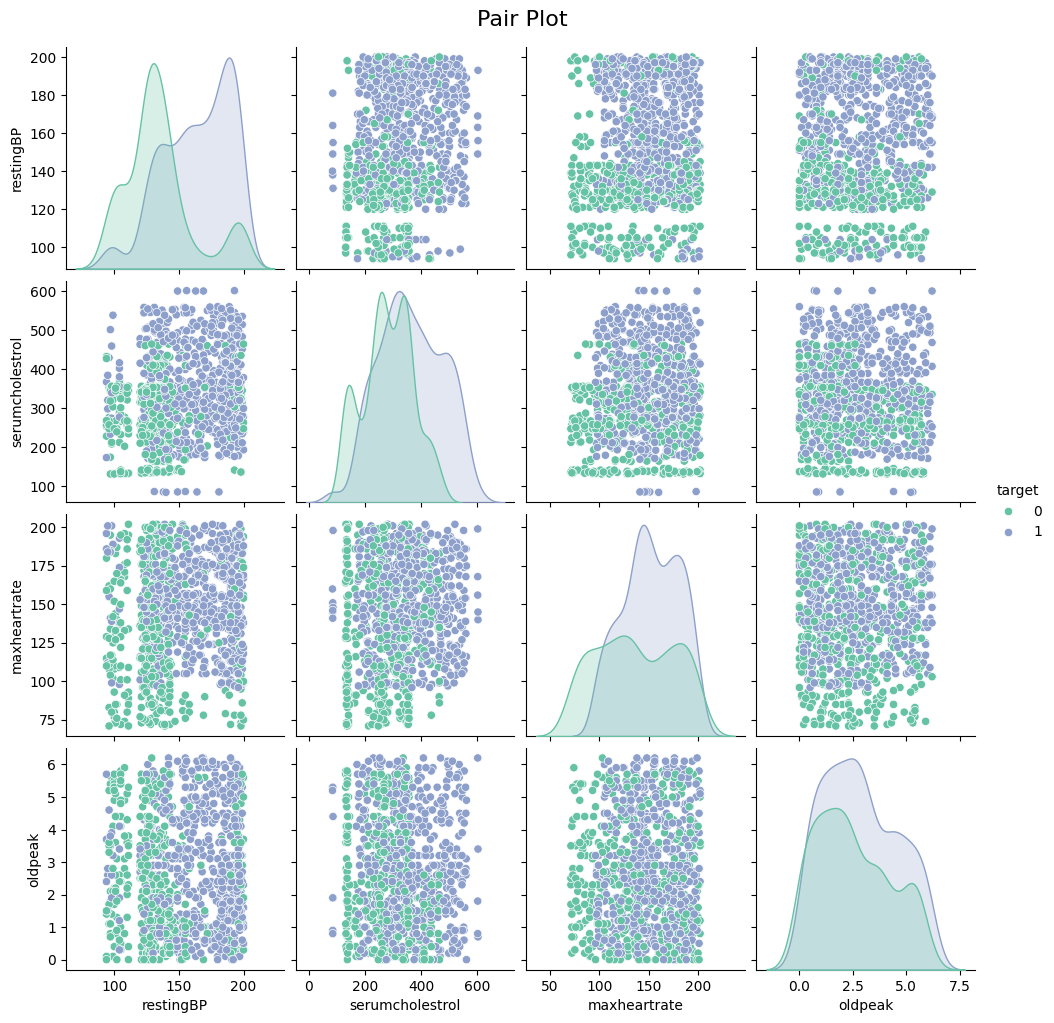

In [91]:
features_for_corr = [
    'restingBP',
    'serumcholestrol',
    'maxheartrate',
    'oldpeak',
    'target'
]
custom_colors = {
    0: '#66c2a5',  
    1:  "#8da0cb"
}
sns.pairplot(
    data[features_for_corr],
    hue='target',
    palette= custom_colors,
    diag_kind='kde'
)

plt.suptitle('Pair Plot', y=1.02, fontsize=16)
plt.show()

## **Observing distribution of numerical features by target**

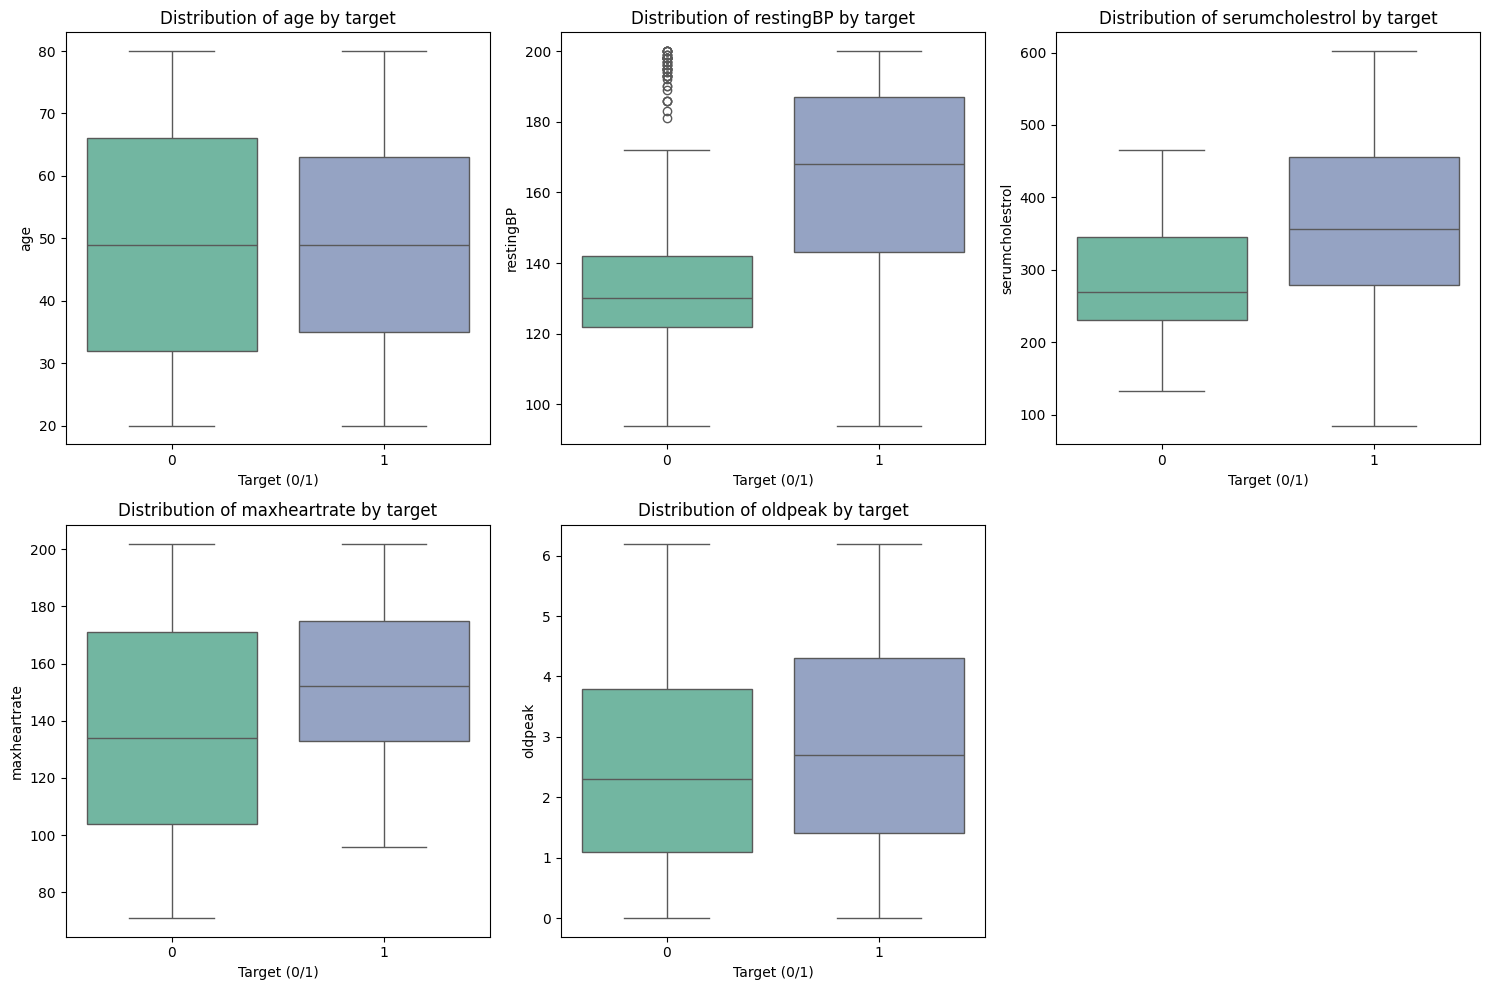

In [80]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=target, y=feature, data=data, palette={1: "#8da0cb" , 0: "#66c2a5"}, hue=target, legend=False)
    
    plt.title(f'Distribution of {feature} by target', fontsize=12)
    plt.xlabel('Target (0/1)', fontsize=10)
    plt.ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

## **Distribution of categorical features by target**

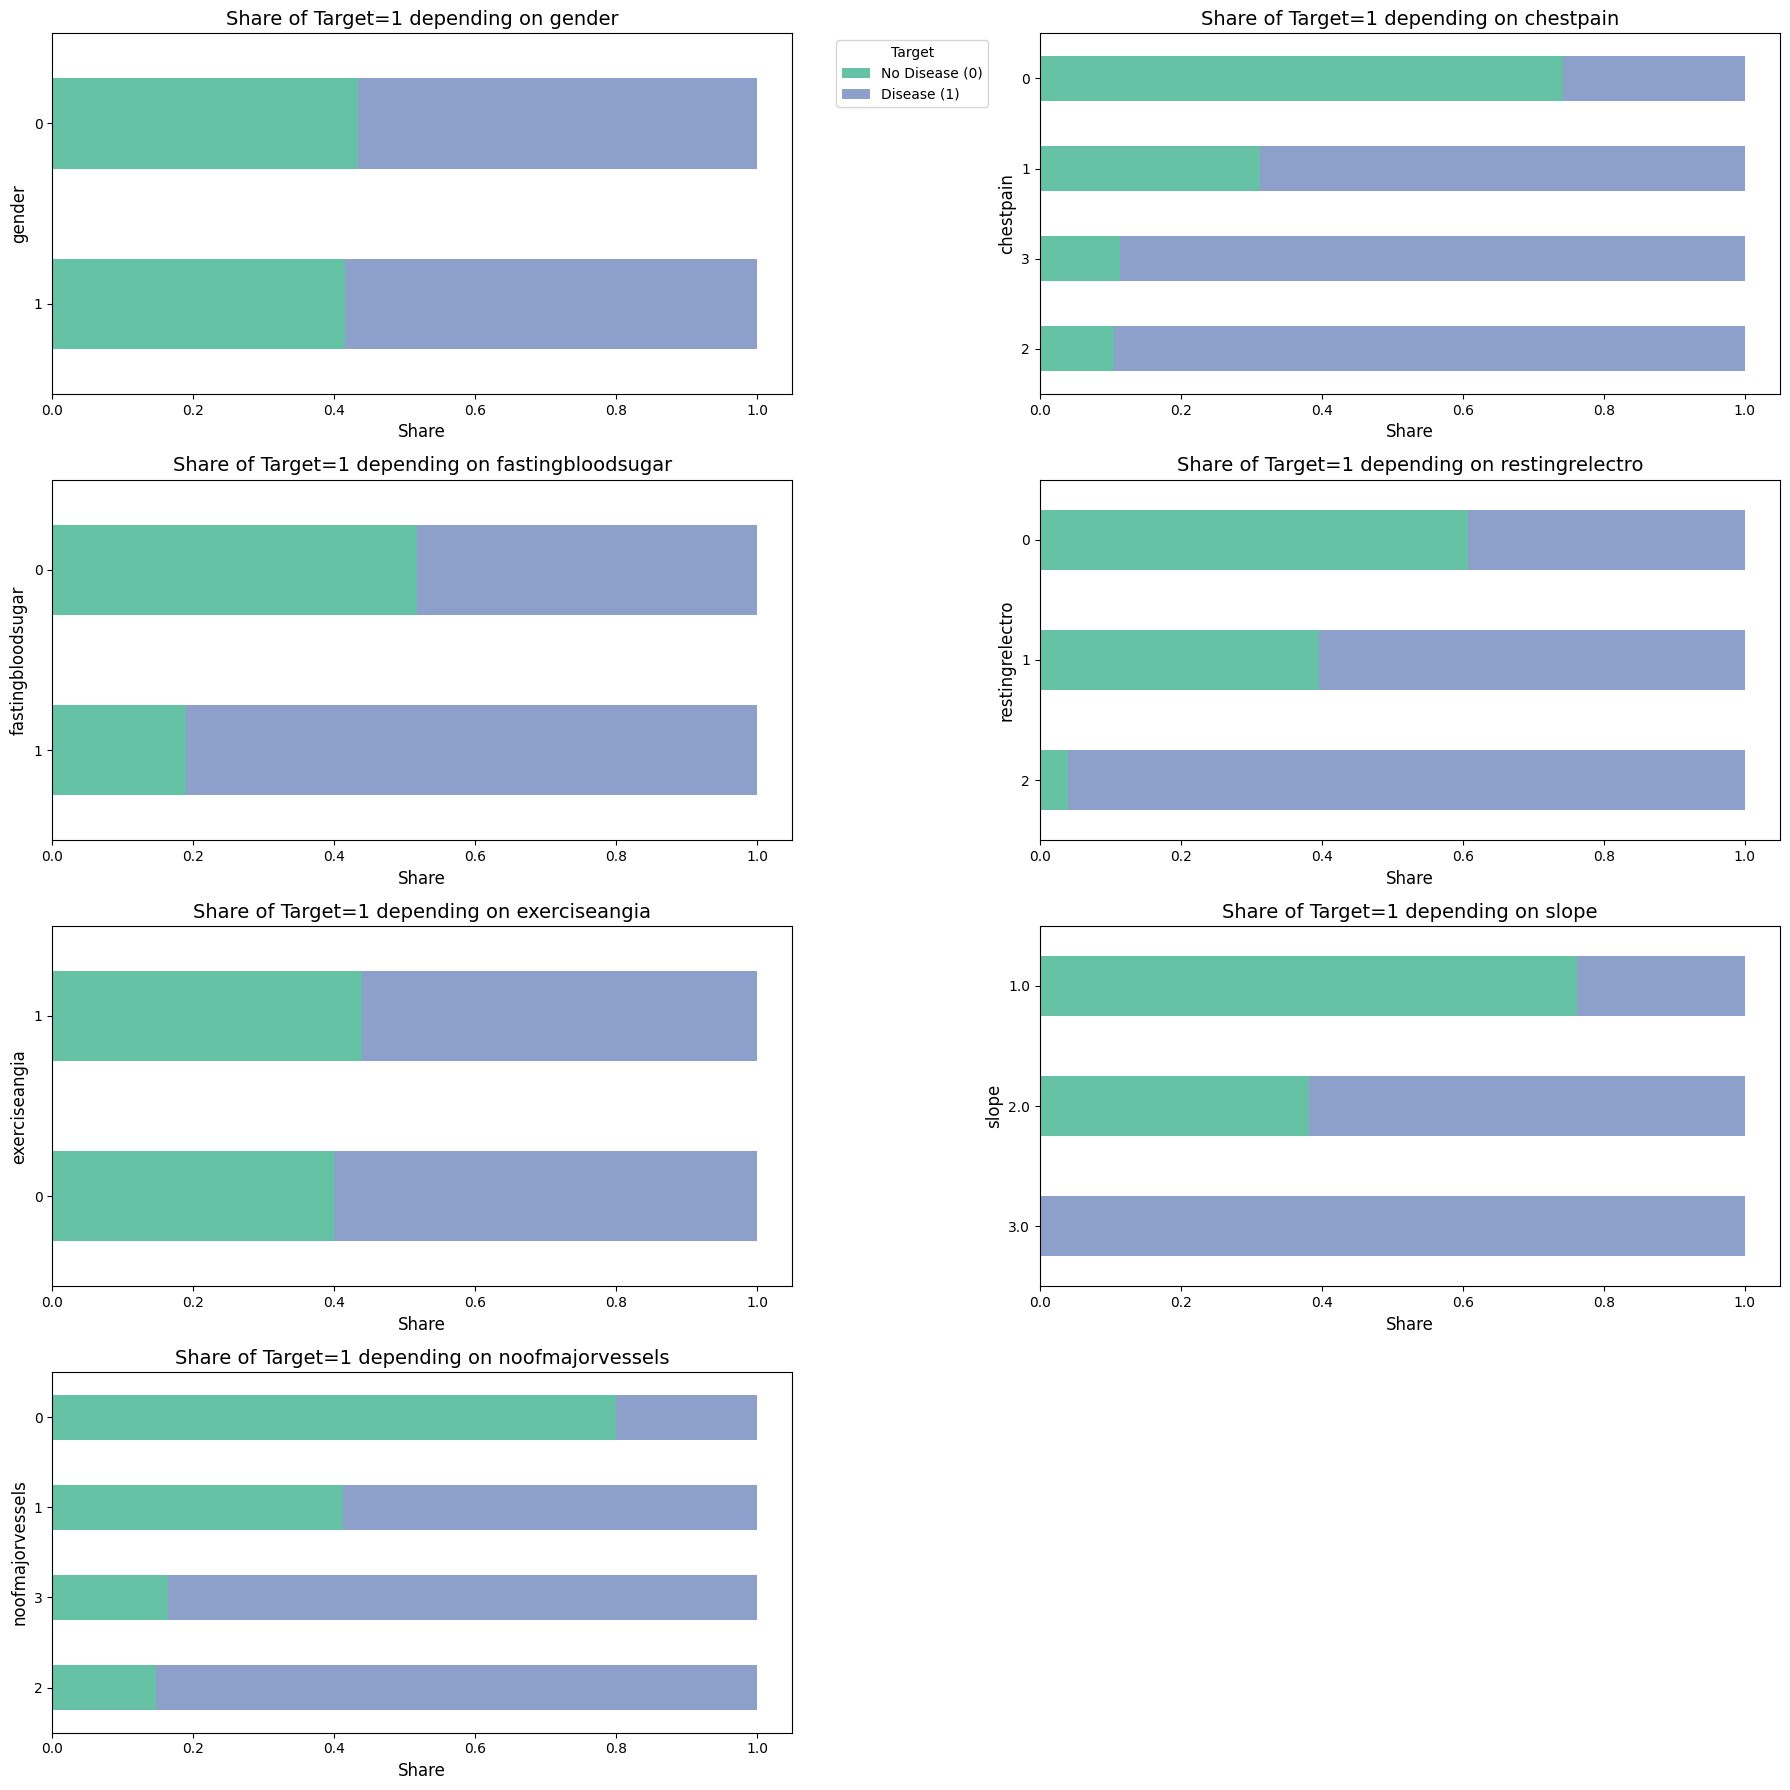

In [83]:
plt.figure(figsize=(18, 18))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    
    counts = data.groupby([feature, target]).size().unstack(fill_value=0)
    
    totals = counts.sum(axis=1)
    proportions = counts.div(totals, axis=0)

    proportions_sorted = proportions.sort_values(by=1, ascending=False)
    proportions_sorted.plot(kind='barh', stacked=True, color=['#66c2a5', "#8da0cb"], ax=plt.gca())
    
    plt.title(f'Share of Target=1 depending on {feature}', fontsize=14)
    plt.xlabel('Share', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    if i == 0:
        plt.legend(title='Target', labels=['No Disease (0)', 'Disease (1)'], bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

## Гипотезы с возрастом есть влияние или нет

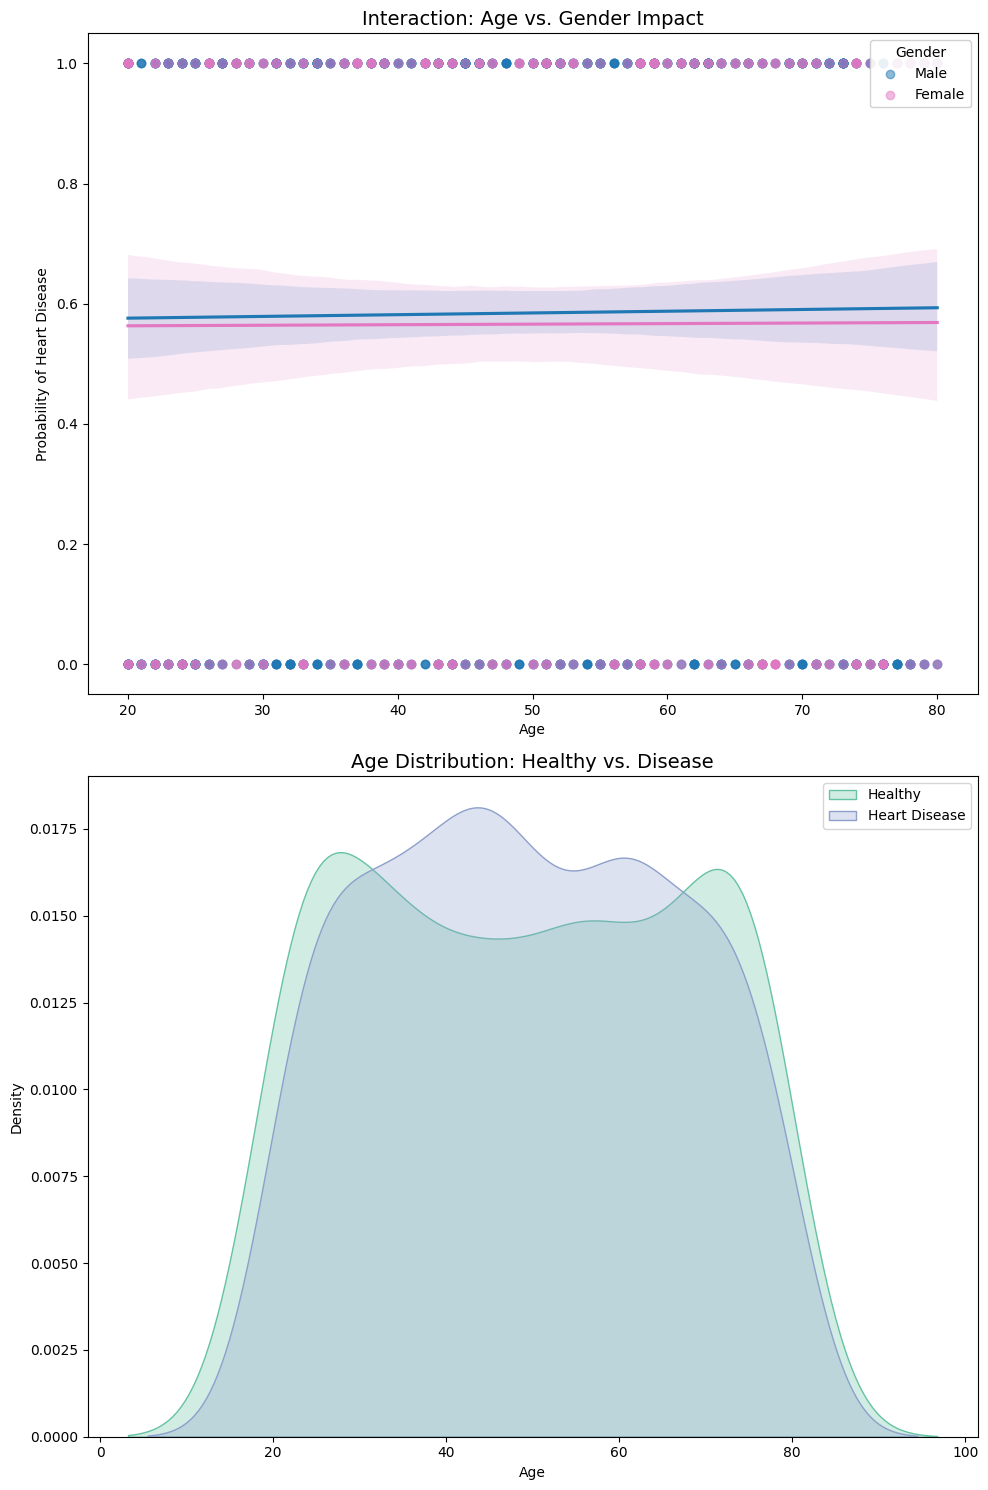

In [86]:
df_analysis = data.copy()

df_analysis['gender_label'] = df_analysis['gender'].map({1: 'Male', 0: 'Female'})

fig, axes = plt.subplots(2, 1, figsize=(10, 15))

colors = {'Male': 'tab:blue', 'Female': 'tab:pink'}
for gender, color in colors.items():
    subset = df_analysis[df_analysis['gender_label'] == gender]
    sns.regplot(x='age', y='target', data=subset, ax=axes[0], 
                scatter_kws={'alpha':0.5}, label=gender, color=color, logistic=True)

axes[0].set_title('Interaction: Age vs. Gender Impact', fontsize=14)
axes[0].set_ylabel('Probability of Heart Disease')
axes[0].set_xlabel('Age')
axes[0].legend(title='Gender', loc='upper right', frameon=True, fancybox=True, framealpha=0.9)

sns.kdeplot(data=df_analysis[df_analysis['target'] == 0]['age'], label='Healthy', fill=True, color='#66c2a5', alpha=0.3, ax=axes[1])
sns.kdeplot(data=df_analysis[df_analysis['target'] == 1]['age'], label='Heart Disease', fill=True, color='#8da0cb', alpha=0.3, ax=axes[1])

axes[1].set_title('Age Distribution: Healthy vs. Disease', fontsize=14)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()

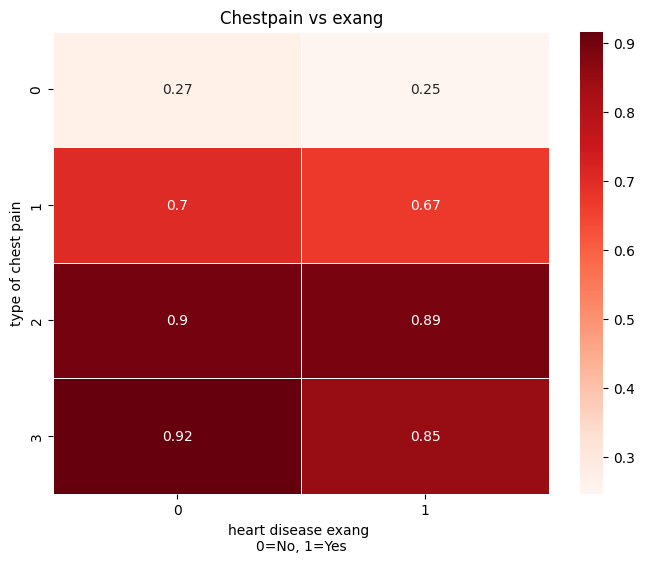

In [89]:
cp_exang_pivot = data.pivot_table(index='chestpain', columns='exerciseangia', values='target', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(
    cp_exang_pivot, 
    annot=True,        
    cmap='Reds',      
    linewidths=.5
)
plt.title("Chestpain vs exang")
plt.ylabel("type of chest pain")
plt.xlabel("heart disease exang \n0=No, 1=Yes")
plt.show()

Accuracy : 86.5 %
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        84
           1       0.89      0.88      0.88       116

    accuracy                           0.86       200

## **Removing Outliers Based on Boxplot Analysis**

In [92]:
outlier_features = ['restingBP', 'serumcholestrol']
for feature in outlier_features:
    upper_bound = data[feature].quantile(0.99)
    data[feature] = np.where(
        data[feature] > upper_bound,
        upper_bound,
        data[feature]
    )

## **Observing new variable which relates restingBP and serumcholestrol**

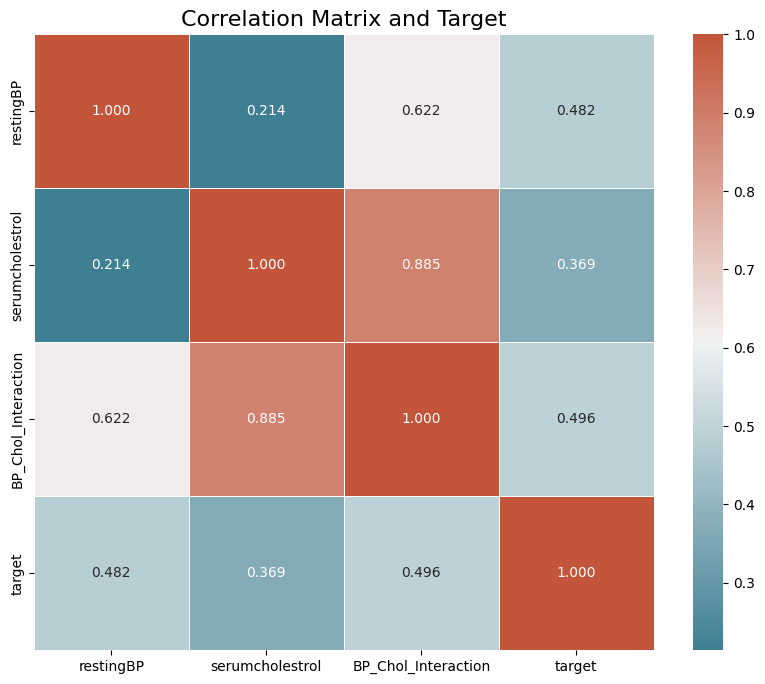

In [93]:
data['BP_Chol_Interaction'] = data['restingBP'] * data['serumcholestrol']
features_for_corr = [
    'restingBP', 
    'serumcholestrol', 
    'BP_Chol_Interaction',
    'target'
]

correlation_matrix = data[features_for_corr].corr()

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(
    correlation_matrix,
    annot=True,      
    cmap=cmap,    
    fmt=".3f",          
    linewidths=.5,      
    cbar=True           
)

plt.title('Correlation Matrix and Target', fontsize=16)
plt.show()

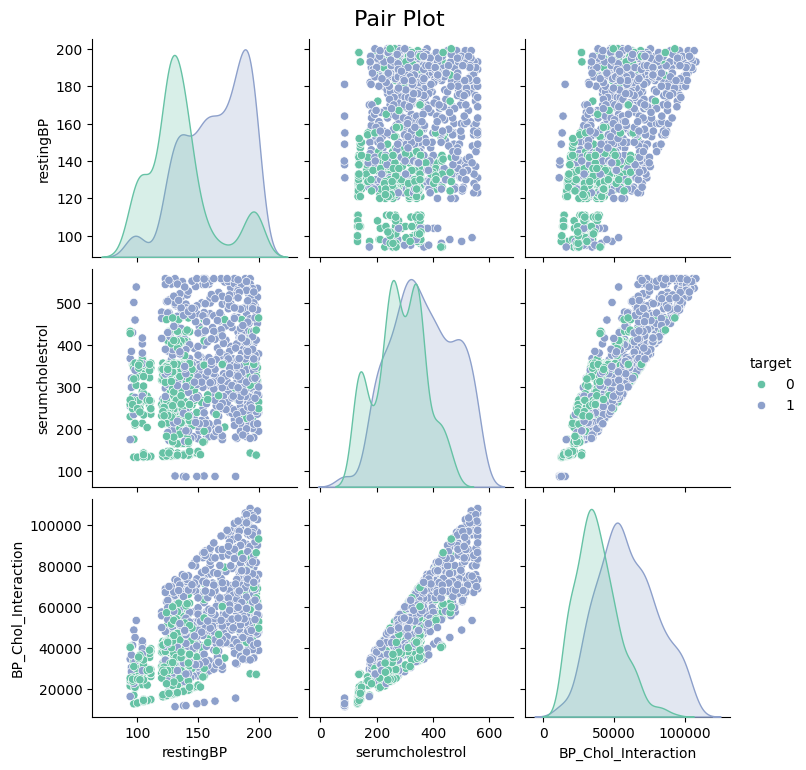

In [94]:
features_for_corr = [
    'restingBP',
    'serumcholestrol',
    'BP_Chol_Interaction',
    'target'
]
custom_colors = {
    0: '#66c2a5',  
    1:  "#8da0cb"
}
sns.pairplot(
    data[features_for_corr],
    hue='target',
    palette= custom_colors,
    diag_kind='kde'
)

plt.suptitle('Pair Plot', y=1.02, fontsize=16)
plt.show()

## **Removing skewness**

In [95]:
skewed_features = ['restingBP', 'serumcholestrol','BP_Chol_Interaction'] 

for feature in skewed_features:
    data[feature] = np.log(data[feature])

## **One hot encoding for nominal features**

In [96]:
ohe_features = ['gender', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia']
ordinal_features = ['chestpain', 'slope', 'noofmajorvessels']
data = pd.get_dummies(data, columns=ohe_features, drop_first=True)

## **Training and splitting data**

In [97]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)
print('Train/Test shapes:', X_train.shape, X_test.shape)

Train/Test shapes: (800, 14) (200, 14)


## **Scaling Numerical Features Using RobustScaler**
### We apply RobustScaler to the numerical features to reduce the influence of outliers and ensure consistent feature scaling.


In [98]:
from sklearn.preprocessing import RobustScaler
numerical_features = X_train.columns.difference([
    'gender_1',              
    'fastingbloodsugar_1',   
    'restingrelectro_1',     
    'restingrelectro_2',     
    'exerciseangia_1'        
])
scaler = RobustScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [99]:
X_train.head()

,age,chestpain,restingBP,serumcholestrol,maxheartrate,oldpeak,slope,noofmajorvessels,BP_Chol_Interaction,gender_1,fastingbloodsugar_1,restingrelectro_1,restingrelectro_2,exerciseangia_1
289,0.100000,-0.5,0.030469,1.040488,-0.203704,-0.530973,0.0,0.5,0.836959,True,False,True,False,True
821,-0.100000,-0.5,-0.522630,-0.554107,-0.944444,-0.849558,0.0,-0.5,-0.720894,True,True,False,False,False
66,1.000000,1.0,0.930554,-0.425988,0.370370,-0.460177,1.0,0.5,0.166512,True,True,False,True,False
190,0.766667,0.5,0.615603,1.066882,-0.018519,0.991150,0.0,0.0,1.174393,True,True,False,False,False
256,1.000000,0.5,0.497032,-0.044620,-0.425926,1.238938,0.0,0.5,0.232950,True,False,False,False,False


## **Before introducing the improved model, we first demonstrate the simplest baseline model.**

In [100]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, Y_train)
dummy_pred = dummy.predict(X_test)

print("Accuracy of a dummy model:", accuracy_score(Y_test, dummy_pred))

Accuracy of a dummy model: 0.58


## **Model training and hyperparameter tuning**

In [102]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Logistic Regression
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

param_lr = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"]
}


# KNN
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier())
])

param_knn = {
    "model__n_neighbors": [3, 5, 7, 9, 11],
    "model__weights": ["uniform", "distance"],
    "model__p": [1, 2] 
}

pipe_dt = Pipeline([
    ("model", DecisionTreeClassifier())
])

param_dt = {
    "model__criterion": ["gini", "entropy"],
    "model__max_depth": [3, 5, 7, 10, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}


models = {
    "Logistic Regression": (pipe_lr, param_lr),
    "KNN": (pipe_knn, param_knn),
    "Decision Tree": (pipe_dt, param_dt)
}



best_models = {}

for name, (pipeline, params) in models.items():

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )

    grid.fit(X_train, Y_train)

    best_models[name] = grid.best_estimator_

    print("Best params:", grid.best_params_)

    y_pred = grid.predict(X_test)
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print(classification_report(Y_test, y_pred))



print("\n===============================")
print(" Model Comparison (Accuracy) ")
print("===============================")

for name, model in best_models.items():
    acc = accuracy_score(Y_test, model.predict(X_test))
    print(f"{name}: {acc:.4f}")


Best params: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Accuracy: 0.905
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        84
           1       0.91      0.93      0.92       116

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.91      0.90       200

Best params: {'model__n_neighbors': 5, 'model__p': 1, 'model__weights': 'distance'}
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        84
           1       0.97      0.94      0.96       116

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Best params: {'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
Accuracy: 0.895
 


   Logistic Regression — Classification Report
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        84
           1       0.91      0.93      0.92       116

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.91      0.90       200



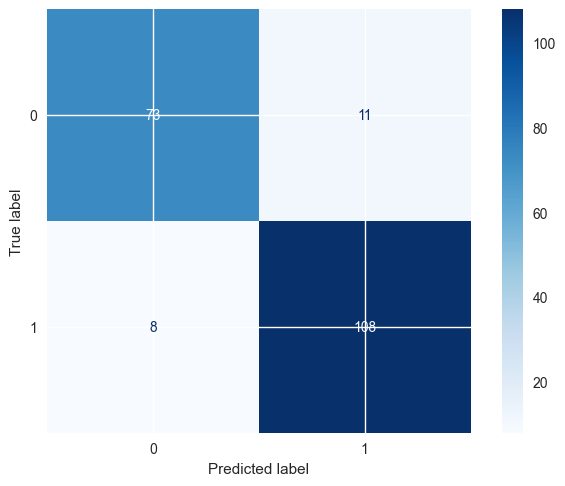


   KNN — Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        84
           1       0.97      0.94      0.96       116

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



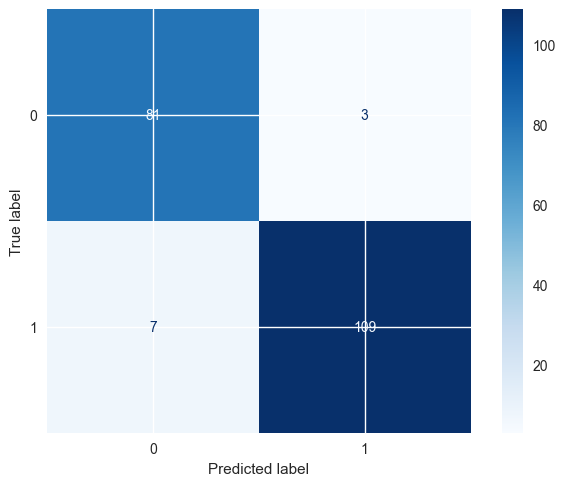


   Decision Tree — Classification Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        84
           1       0.93      0.89      0.91       116

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



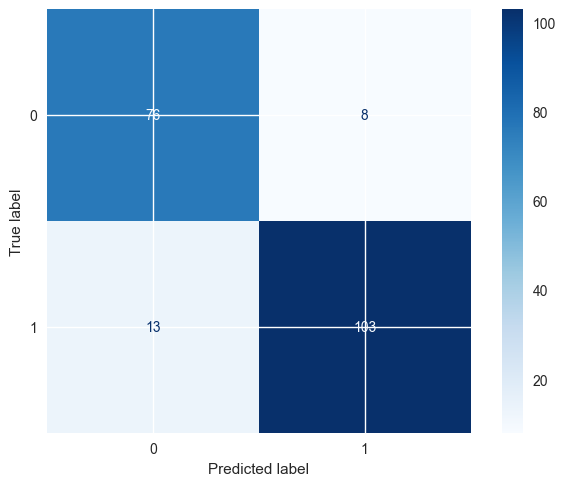

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


for name, model in best_models.items():
    print(f"\n==============================")
    print(f"   {name} — Classification Report")
    print("==============================")
    
    y_pred = model.predict(X_test)
    print(classification_report(Y_test, y_pred))

    cm = confusion_matrix(Y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    disp.plot(cmap='Blues')
    plt.show()


## **ROC curve**

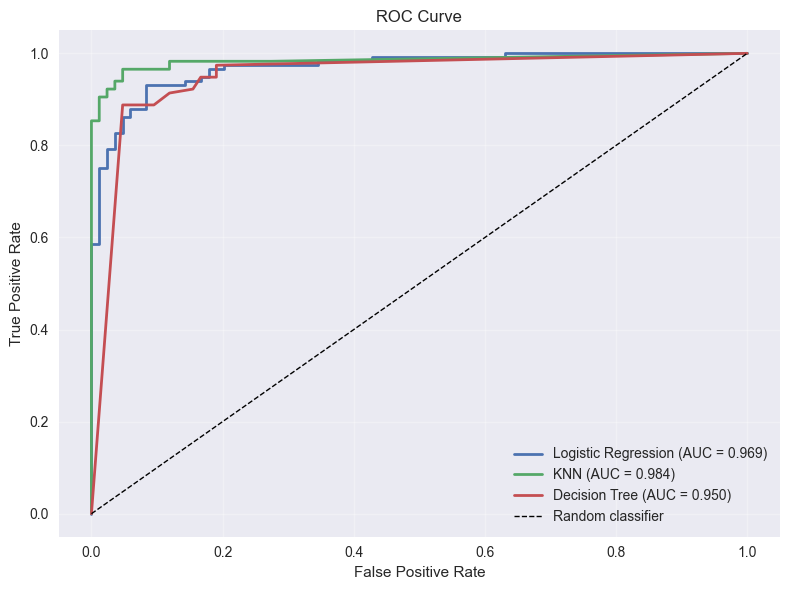

In [115]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(models, X_test, Y_test):
    plt.figure(figsize=(8, 6))

    classes = np.unique(Y_test)
    is_multiclass = len(classes) > 2

    if is_multiclass:
        y_test_bin = label_binarize(Y_test, classes=classes)

        for name, model in models.items():
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test)
            else:
                y_score = model.decision_function(X_test)
            
            fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

    else:
        for name, model in models.items():
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(X_test)[:, 1]
            else:
                y_score = model.decision_function(X_test)

            fpr, tpr, _ = roc_curve(Y_test, y_score)
            roc_auc = auc(fpr, tpr)

            plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], "k--", lw=1, label="Random classifier")

    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


plot_roc_curve(best_models, X_test, Y_test)


## **Clastering**

In [116]:
from sklearn.cluster import KMeans

kmeans_features = [
    'age', 
    'restingBP', 
    'serumcholestrol', 
    'maxheartrate', 
    'BP_Chol_Interaction'
]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

X_train['patient_cluster'] = kmeans.fit_predict(X_train[kmeans_features])

X_test['patient_cluster'] = kmeans.predict(X_test[kmeans_features])
X_train = pd.get_dummies(X_train, columns=['patient_cluster'], prefix='cluster')
X_test = pd.get_dummies(X_test, columns=['patient_cluster'], prefix='cluster')

print("X_train:", [col for col in X_train.columns if 'cluster' in col])

X_train: ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3']


Accuracy : 92.0 %
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        84
           1       0.92      0.94      0.93       116

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



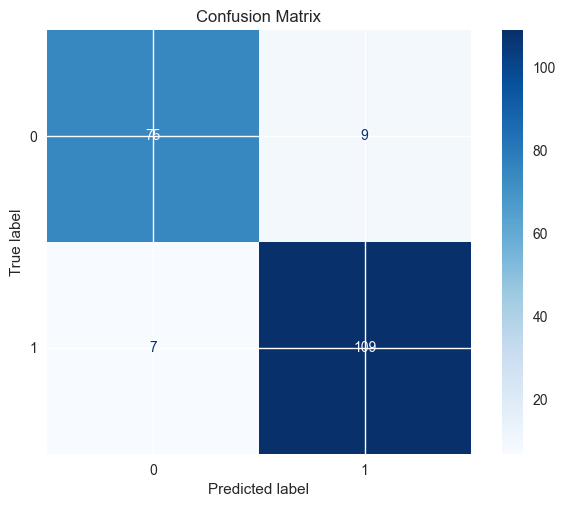

In [117]:
logist_regres = LogisticRegression()
logist_regres.fit(X_train, Y_train)
Y_pred_new = logist_regres.predict(X_test)
accuracy_result = accuracy_score(Y_test,Y_pred_new) * 100

print('Accuracy : {} %'.format(accuracy_result))
print(classification_report(Y_test, Y_pred_new))
cm_new = confusion_matrix(Y_test, Y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_new)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

Accuracy : 92.0 %
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        84
           1       0.95      0.93      0.94       116

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



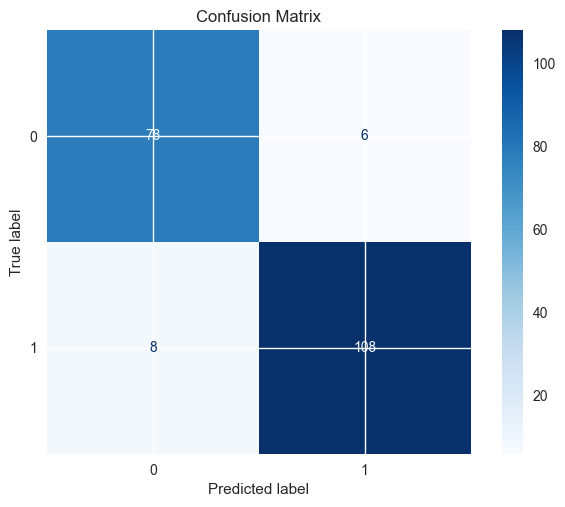

In [118]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred_tree_new = tree.predict(X_test)

accuracy_result_tree = accuracy_score(Y_test,Y_pred_new) * 100

print('Accuracy : {} %'.format(accuracy_result_tree))
print(classification_report(Y_test, Y_pred_tree_new))
cm_new = confusion_matrix(Y_test, Y_pred_tree_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_new)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

/var/folders/l0/pbbr_nyj1y306_f2ys_mpgsh0000gn/T/ipykernel_7572/2321491281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='slope', y='oldpeak', data=data[data['target'] == 0], ax=axes[0], palette='Greens')
/var/folders/l0/pbbr_nyj1y306_f2ys_mpgsh0000gn/T/ipykernel_7572/2321491281.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='slope', y='oldpeak', data=data[data['target'] == 1], ax=axes[1], palette='Reds')


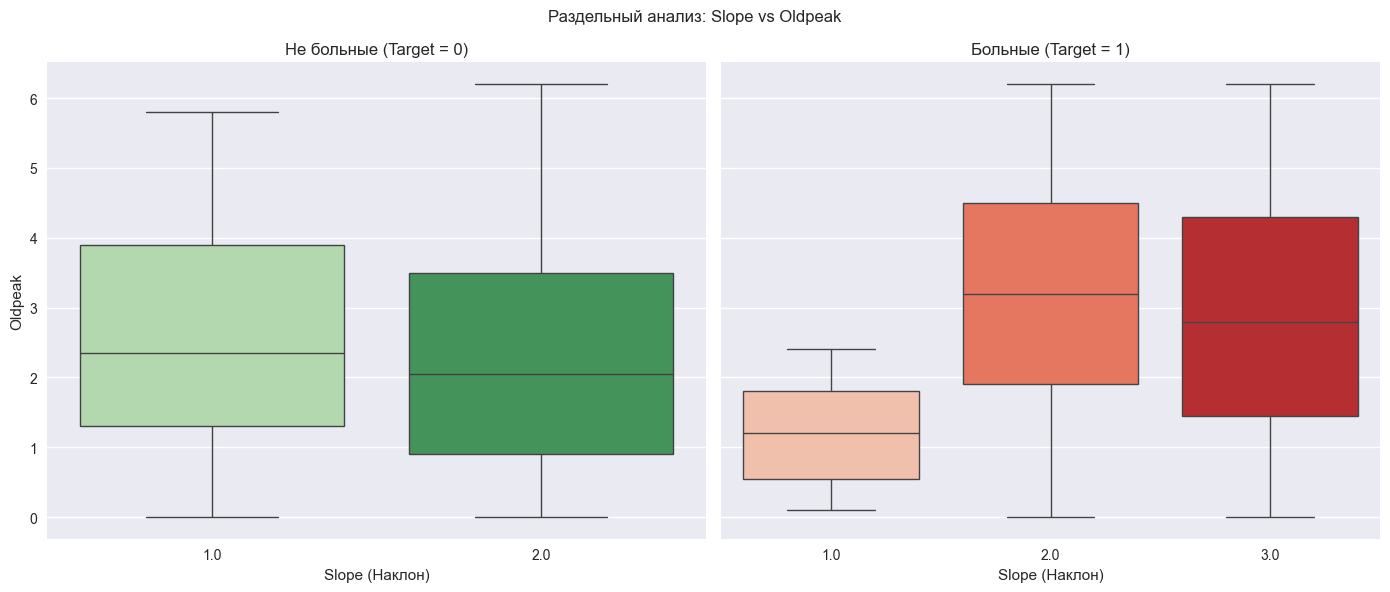

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(x='slope', y='oldpeak', data=data[data['target'] == 0], ax=axes[0], palette='Greens')
axes[0].set_title("Не больные (Target = 0)")
axes[0].set_xlabel("Slope (Наклон)")
axes[0].set_ylabel("Oldpeak")

sns.boxplot(x='slope', y='oldpeak', data=data[data['target'] == 1], ax=axes[1], palette='Reds')
axes[1].set_title("Больные (Target = 1)")
axes[1].set_xlabel("Slope (Наклон)")
axes[1].set_ylabel("")

plt.suptitle("Раздельный анализ: Slope vs Oldpeak")
plt.tight_layout()
plt.show()

In [120]:
data['high_risk_zone'] = ((data['slope'] >= 2) & (data['oldpeak'] > 2.0)).astype(int)

# Проверяем, что получилось
print(data[['slope', 'oldpeak', 'high_risk_zone']].head())

   slope  oldpeak  high_risk_zone
0    3.0      5.3               1
1    1.0      3.7               0
2    1.0      5.0               0
3    2.0      3.2               1
4    3.0      5.3               1


In [121]:
X1 = data.drop('target', axis=1)
Y1 = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X1,
    Y1,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

from sklearn.preprocessing import RobustScaler
numerical_features = X_train.columns.difference([
    'gender_1',              # OHE
    'fastingbloodsugar_1',   # OHE
    'restingrelectro_1',     # OHE
    'restingrelectro_2',     # OHE
    'exerciseangia_1'        # OHE
])
scaler = RobustScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

from sklearn.cluster import KMeans

kmeans_features = [
    'age', 
    'restingBP', 
    'serumcholestrol', 
    'maxheartrate', 
    'BP_Chol_Interaction'
]

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

X_train['patient_cluster'] = kmeans.fit_predict(X_train[kmeans_features])

X_test['patient_cluster'] = kmeans.predict(X_test[kmeans_features])
X_train = pd.get_dummies(X_train, columns=['patient_cluster'], prefix='cluster')
X_test = pd.get_dummies(X_test, columns=['patient_cluster'], prefix='cluster')
X_train.head()


,age,chestpain,restingBP,serumcholestrol,maxheartrate,oldpeak,slope,noofmajorvessels,BP_Chol_Interaction,gender_1,fastingbloodsugar_1,restingrelectro_1,restingrelectro_2,exerciseangia_1,high_risk_zone,cluster_0,cluster_1,cluster_2,cluster_3
289,0.100000,-0.5,0.030469,1.040488,-0.203704,-0.530973,0.0,0.5,0.836959,True,False,True,False,True,0.0,False,True,False,False
821,-0.100000,-0.5,-0.522630,-0.554107,-0.944444,-0.849558,0.0,-0.5,-0.720894,True,True,False,False,False,0.0,True,False,False,False
66,1.000000,1.0,0.930554,-0.425988,0.370370,-0.460177,1.0,0.5,0.166512,True,True,False,True,False,0.0,False,False,True,False
190,0.766667,0.5,0.615603,1.066882,-0.018519,0.991150,0.0,0.0,1.174393,True,True,False,False,False,1.0,False,True,False,False
256,1.000000,0.5,0.497032,-0.044620,-0.425926,1.238938,0.0,0.5,0.232950,True,False,False,False,False,1.0,False,True,False,False


Accuracy : 91.5 %
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        84
           1       0.92      0.94      0.93       116

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.92      0.91       200



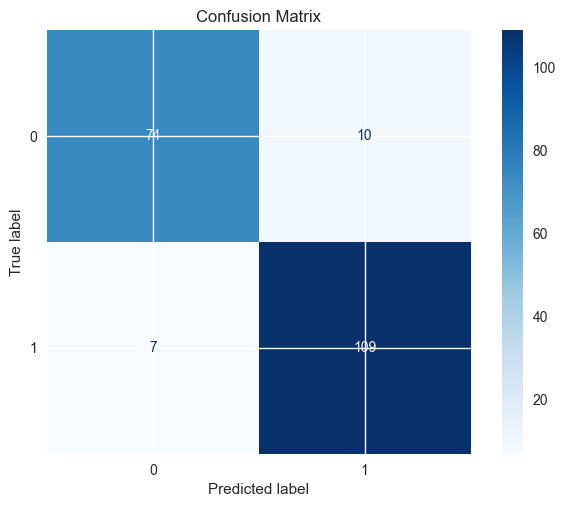

In [122]:
logist_regres = LogisticRegression()
logist_regres.fit(X_train, Y_train)
Y_pred_new = logist_regres.predict(X_test)
accuracy_result = accuracy_score(Y_test,Y_pred_new) * 100

print('Accuracy : {} %'.format(accuracy_result))
print(classification_report(Y_test, Y_pred_new))
cm_new = confusion_matrix(Y_test, Y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_new)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()